You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/fall22/Lectures/Class3-Python_Crash_Course/Python_Crash_course/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links
[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=red)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)
[![Profile](https://img.shields.io/badge/profiole-000?style=for-the-badge&logo=ko-fi&logoColor=white)](https://huntsman.usu.edu/directory/jahangiry-pedram)
[![linkedin](https://img.shields.io/badge/linkedin-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

---

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [6]:
year =2021
month= 1
day =1

In [7]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [8]:
# we can extract any information from our datetime object. 
my_date.month

1

In [9]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [10]:
import numpy as np

In [11]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [12]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [13]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [14]:
import pandas as pd

In [15]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2020-01-01', periods=7, freq='D')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [17]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [18]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [19]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(['first day of the year', 'first day of school'], custom_index, ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [20]:
df.columns

Index(['Event'], dtype='object')

In [21]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [22]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [23]:
df.index.argmax()

1

#### Pandas datareader

In [24]:
import pandas_datareader.data as web

In [34]:
start = pd.to_datetime('2021-01-01')
end   = pd.to_datetime('today')

In [35]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [36]:
Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
Stocks.tail()

Attributes    Adj Close                    Close                     High  \
Symbols            TSLA        AAPL         TSLA        AAPL         TSLA   
Date                                                                        
2022-01-12  1106.219971  175.529999  1106.219971  175.529999  1114.839966   
2022-01-13  1031.560059  172.190002  1031.560059  172.190002  1115.599976   
2022-01-14  1049.609985  173.070007  1049.609985  173.070007  1052.000000   
2022-01-18  1030.510010  169.800003  1030.510010  169.800003  1070.790039   
2022-01-19  1002.330017  167.710007  1002.330017  167.710007  1054.669922   

Attributes                      Low                     Open              \
Symbols           AAPL         TSLA        AAPL         TSLA        AAPL   
Date                                                                       
2022-01-12  177.179993  1072.589966  174.820007  1078.849976  176.119995   
2022-01-13  176.619995  1026.540039  171.789993  1109.069946  175.779999   
2022-01-14  173.779999  1013.380005  171.089996  1019.880005  171.339996   
2022-01-18  172.539993  1016.059998  169.410004  1026.609985  171.509995   
2022-01-19  171.080002   995.500000  167.360001  1041.699951  170.000000   

Attributes      Volume              
Symbols           TSLA        AAPL  
Date                                
2022-01-12  27913000.0  74805200.0  
2022-01-13  32403300.0  84505800.0  
2022-01-14  24246600.0  80355000.0  
2022-01-18  22247800.0  90956700.0  
2022-01-19  18864613.0  60815142.0

In [38]:
df= round(Stocks['Adj Close'],2)
df.tail()

Symbols,TSLA,AAPL
Date,,
2022-01-12,1106.22,175.53
2022-01-13,1031.56,172.19
2022-01-14,1049.61,173.07
2022-01-18,1030.51,169.80
2022-01-19,1002.33,167.71


In [40]:
import matplotlib.pyplot as plt

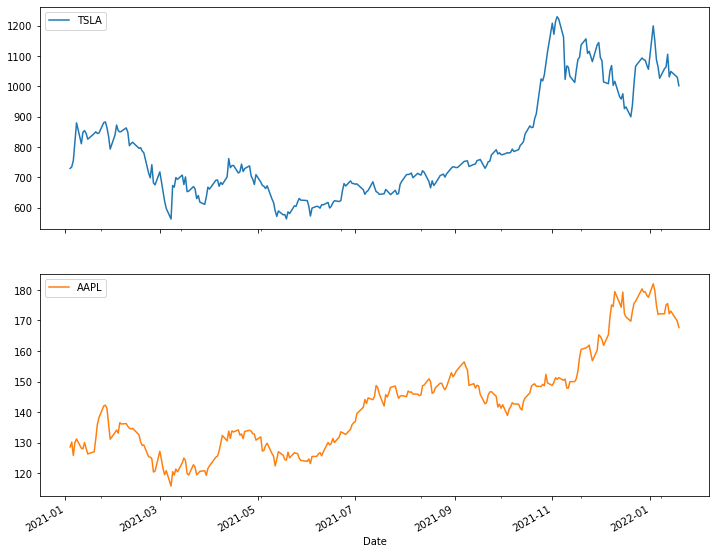

In [41]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [42]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-10',
               '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
               '2022-01-18', '2022-01-19'],
              dtype='datetime64[ns]', name='Date', length=264, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [43]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

Symbols,TSLA,AAPL
Date,,
2021-01-31,828.776842,132.221579
2021-02-28,794.269474,130.879474
2021-03-31,656.802609,121.305217
2021-04-30,709.618095,131.201429
2021-05-31,616.753000,126.366500
2021-06-30,626.919545,129.575455
2021-07-31,659.134762,144.710952
2021-08-31,705.243182,147.922273
2021-09-30,753.952381,148.090000


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [44]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

Symbols,TSLA,AAPL
Date,,
2021-01-31,1.000000,1.000000
2021-02-28,0.958363,0.989850
2021-03-31,0.792496,0.917439
2021-04-30,0.856223,0.992285
2021-05-31,0.744173,0.955718
2021-06-30,0.756440,0.979987
2021-07-31,0.795310,1.094458
2021-08-31,0.850945,1.118745
2021-09-30,0.909717,1.120014


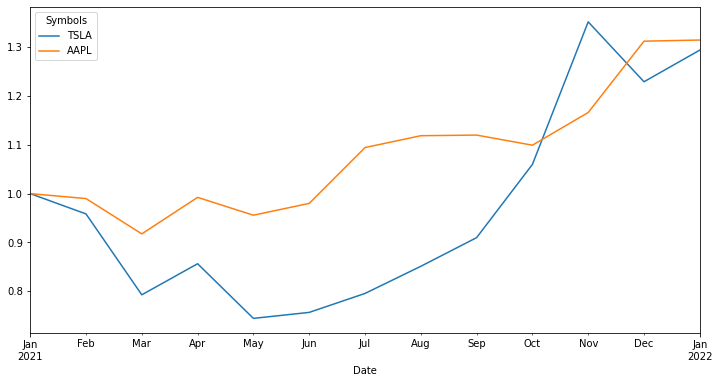

In [45]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [46]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

Symbols,TSLA,AAPL
Date,,
2021-01-31,0.087370,0.019670
2021-02-28,-0.195651,-0.094659
2021-03-31,-0.070292,-0.044182
2021-04-30,0.072066,0.068774
2021-05-31,-0.087137,-0.058217
2021-06-30,0.089437,0.102090
2021-07-31,0.013689,0.062619
2021-08-31,0.036707,0.044938
2021-09-30,0.056383,-0.072231


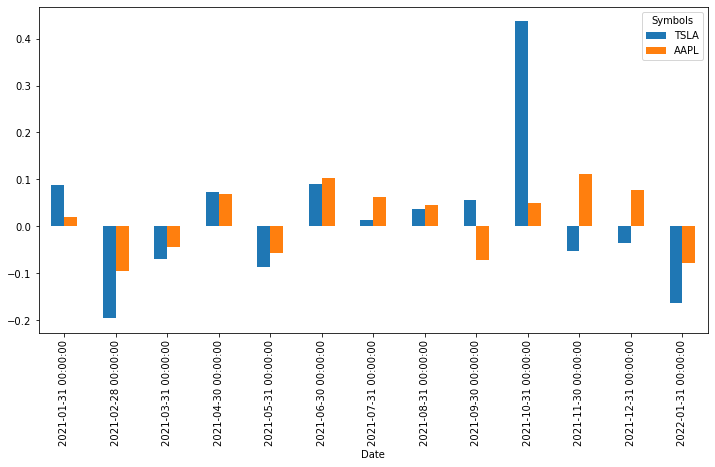

In [47]:
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [48]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2021-01-04,128.62
2021-01-05,130.21
2021-01-06,125.82
2021-01-07,130.12
2021-01-08,131.24


In [49]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2021-01-04,128.62,NaN,130.21
2021-01-05,130.21,128.62,125.82
2021-01-06,125.82,130.21,130.12
2021-01-07,130.12,125.82,131.24
2021-01-08,131.24,130.12,128.19


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [50]:
df.head()

Symbols,TSLA,AAPL
Date,,
2021-01-04,729.77,128.62
2021-01-05,735.11,130.21
2021-01-06,755.98,125.82
2021-01-07,816.04,130.12
2021-01-08,880.02,131.24


In [51]:
df.rolling(window=5).mean().head()

Symbols,TSLA,AAPL
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,783.384,129.202


In [52]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [53]:
df.head()

Symbols,TSLA,AAPL,TSLA_MA(30)
Date,,,
2021-01-04,729.77,128.62,NaN
2021-01-05,735.11,130.21,NaN
2021-01-06,755.98,125.82,NaN
2021-01-07,816.04,130.12,NaN
2021-01-08,880.02,131.24,NaN


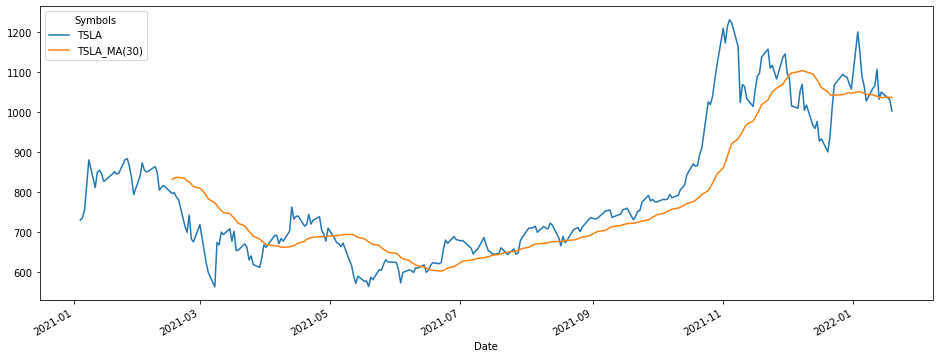

In [54]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [55]:
df['AAPL'].head()

Date
2021-01-04    128.62
2021-01-05    130.21
2021-01-06    125.82
2021-01-07    130.12
2021-01-08    131.24
Name: AAPL, dtype: float64

In [56]:
df['AAPL'].expanding().mean().head()

Date
2021-01-04    128.620000
2021-01-05    129.415000
2021-01-06    128.216667
2021-01-07    128.692500
2021-01-08    129.202000
Name: AAPL, dtype: float64

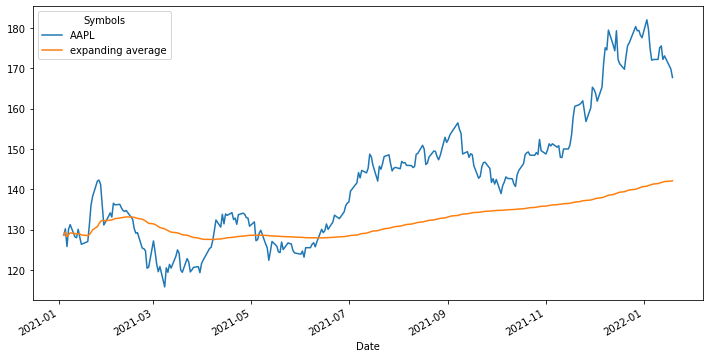

In [57]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()